In [1]:
import numpy as np
import pandas as pd 
import pylab as pl
from matplotlib import pyplot as plt #画图
from sklearn.cluster import KMeans 
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import pandas_datareader as datareader
import matplotlib.pyplot as plt
import datetime
from mpl_finance import candlestick_ohlc
# from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

reading data from reading_scroll_features table and some data cleaning 

In [2]:
data = pd.read_csv('data/tbl_reading_style.csv')
data = data[data['relative_time'] < 2000]
data.head()

,user_id,reading_session,article_id,scroll_range,max_offset,min_offset,offset_difference,relative_time,reading_duration
0,111,00c29290-338e-42e9-8897-c475c799e1e5,30118783,7116,61,10,51,0,1
1,111,00c29290-338e-42e9-8897-c475c799e1e5,30118783,7116,0,0,0,1,1
2,111,2684b548-a936-46f8-90d7-3941bb9cd096,30345801,6830,203,5,198,0,1
3,111,2684b548-a936-46f8-90d7-3941bb9cd096,30345801,6830,336,0,-336,1,1
4,111,2684b548-a936-46f8-90d7-3941bb9cd096,30367210,5404,650,46,604,0,10


display how each user's reading relative time distributed. 

(7593,)
(7593,)
(7593, 2)


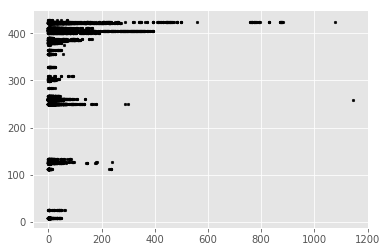

In [3]:
f1 = data['relative_time'].values
print(f1.shape)
f2= data['user_id'].values
print(f2.shape)
x = np.array(list(zip(f1,f2)))
print(x.shape)
plt.scatter(f1,f2, c='black', s=7)
#filter data 1.filtered() 2.sql 



In [4]:
# for index, row in data.iterrows():
#     if row['offset_difference'] < 0:
#         temp = row['max_offset']
#         row['max_offset'] = row['min_offset']
#        row['min_offset'] = temp
#         print(row['max_offset'],row['min_offset'],row['offset_difference'])
#         np.append([row['max_offset'],row['min_offset'],row['offset_difference']],a)
#     if row['offset_difference'] > 0:
#         np.append([row['max_offset'],row['min_offset'],row['offset_difference']],a)
#         print(row['max_offset'],row['min_offset'],row['offset_difference'])



display reading style by users

In [5]:
pd.options.display.max_rows = 1000
filtered_data =  data[(data['user_id'] == 356)]
filtered_data.head()




,user_id,reading_session,article_id,scroll_range,max_offset,min_offset,offset_difference,relative_time,reading_duration
3285,356,8681e5c0-d575-4397-87f4-1a4558829985,40598015,5800,1513,20,1493,0,27
3286,356,8681e5c0-d575-4397-87f4-1a4558829985,40598015,5800,1826,1539,287,1,27
3287,356,8681e5c0-d575-4397-87f4-1a4558829985,40598015,5800,1626,1464,-162,2,27
3288,356,8681e5c0-d575-4397-87f4-1a4558829985,40598015,5800,1462,1331,-131,4,27
3289,356,8681e5c0-d575-4397-87f4-1a4558829985,40598015,5800,1330,1328,-2,5,27


In [6]:
filtered_data1 = filtered_data[(filtered_data['article_id'] ==40598015 )]
filtered_data2 = filtered_data[(filtered_data['article_id'] ==40598351 )]
filtered_data3 = filtered_data[(filtered_data['article_id'] ==40609989 )]
filtered_data4 = filtered_data[(filtered_data['article_id'] ==40622173 )]
filtered_data5 = filtered_data[(filtered_data['article_id'] ==40622623 )]
filtered_data6 = filtered_data[(filtered_data['article_id'] ==40642701 )]
filtered_data7 = filtered_data[(filtered_data['article_id'] ==40652803 )]
filtered_data8 = filtered_data[(filtered_data['article_id'] ==40669333 )]
filtered_data9 = filtered_data[(filtered_data['article_id'] ==40673053 )]
filtered_data10 = filtered_data[(filtered_data['article_id'] ==40673919 )]
filtered_data11 = filtered_data[(filtered_data['article_id'] ==40708853 )]
filtered_data12 = filtered_data[(filtered_data['article_id'] ==40051032 )]
filtered_data13 = filtered_data[(filtered_data['article_id'] ==40762246 )]
filtered_data14 = filtered_data[(filtered_data['article_id'] ==40483774 )]


# + --------------- +
# | article_id      |
# + --------------- +
# | 40598015        |
# | 40598351        |
# | 40609989        |
# | 40622173        |
# | 40622623        |
# | 40642701        |
# | 40652803        |
# | 40669333        |
# | 40673053        |
# | 40673919        |
# | 40708853        |
# | 40051032        |
# | 40762246        |
# | 40483774        |
# + --------------- +

([<matplotlib.lines.Line2D at 0x1a1b69e9b0>,
  <matplotlib.patches.Rectangle at 0x1a1b6db860>])

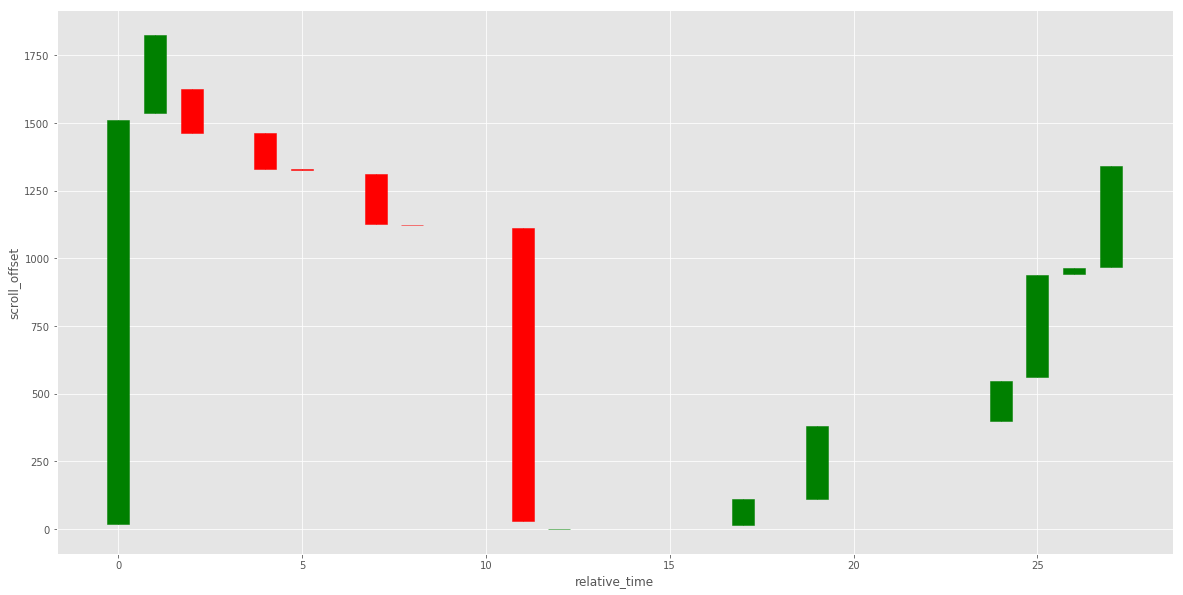

In [7]:
#for i in filtered_data: 
  #  if filtered_data['offset_difference'] > 0:
  ##      ohlc= filtered_data[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()
 #   else:
#        ohlc= filtered_data[['relative_time',  'min_offset','min_offset','max_offset', 'max_offset']].copy()
        
ohlc =pd.DataFrame(columns=['date', 'open', 'high', 'low', 'close'])
for index, row in filtered_data1.iterrows():
    if int(row['offset_difference'])>0:
        ohlc.loc[index]=[row['relative_time'], row['min_offset'], row['max_offset'], row['min_offset'],row['max_offset']]
    else :
        ohlc.loc[index]=[row['relative_time'], row['max_offset'], row['max_offset'], row['min_offset'],row['min_offset']]

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')




([<matplotlib.lines.Line2D at 0x1a1bb48a90>,
  <matplotlib.patches.Rectangle at 0x1a1bb52fd0>])

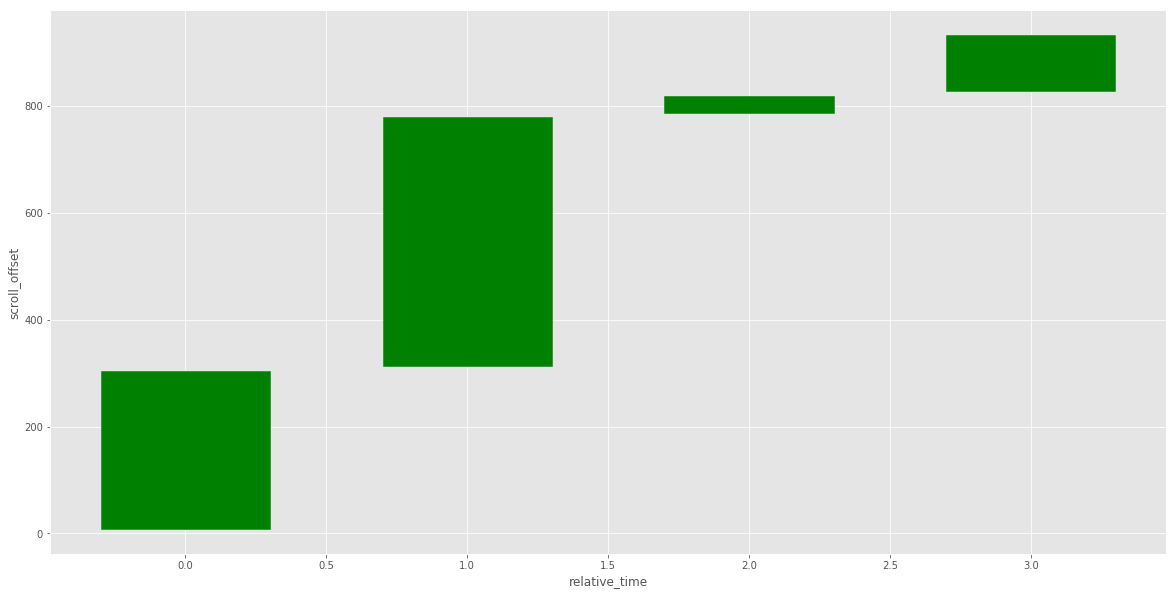

In [8]:
ohlc =pd.DataFrame(columns=['date', 'open', 'high', 'low', 'close'])
for index, row in filtered_data2.iterrows():
    if int(row['offset_difference'])>0:
        ohlc.loc[index]=[row['relative_time'], row['min_offset'], row['max_offset'], row['min_offset'],row['max_offset']]
    else :
        ohlc.loc[index]=[row['relative_time'], row['max_offset'], row['max_offset'], row['min_offset'],row['min_offset']]
f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a1b05cef0>,
  <matplotlib.patches.Rectangle at 0x1a1b04dda0>])

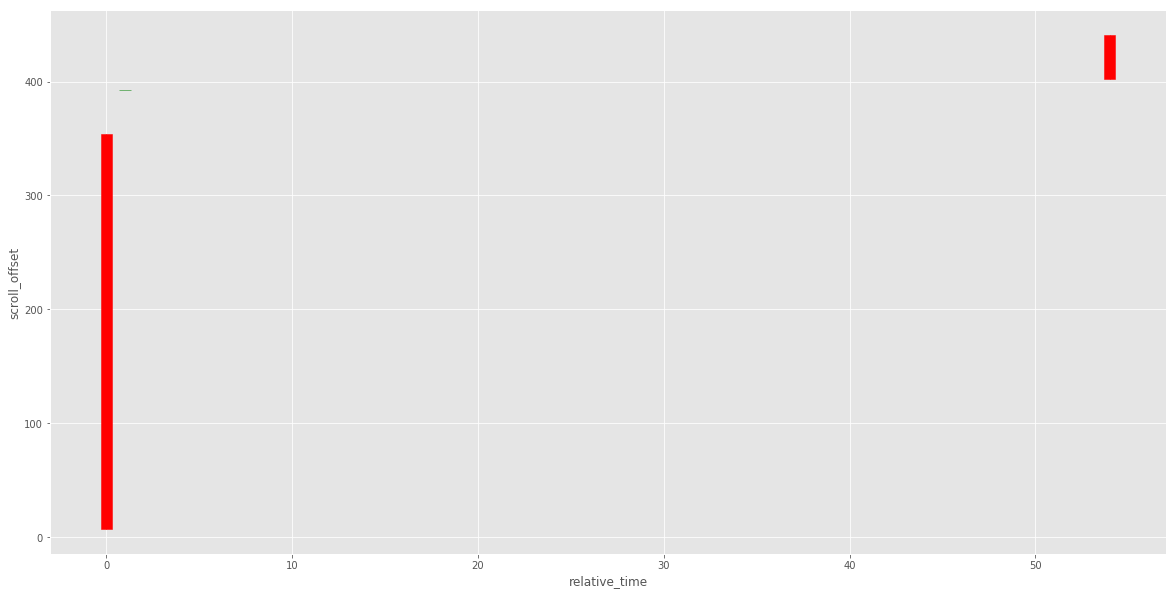

In [9]:
ohlc= filtered_data3[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a1bc09198>],
 [<matplotlib.patches.Rectangle at 0x1a1bc092e8>])

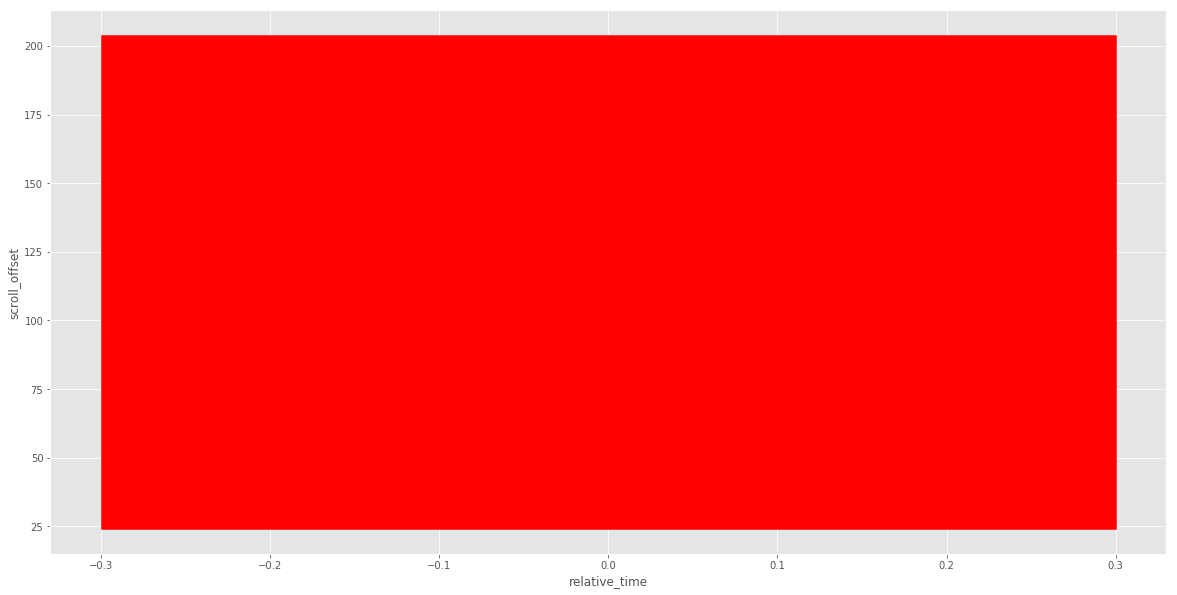

In [10]:
ohlc= filtered_data4[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a1bf18f60>],
 [<matplotlib.patches.Rectangle at 0x1a1bf200f0>])

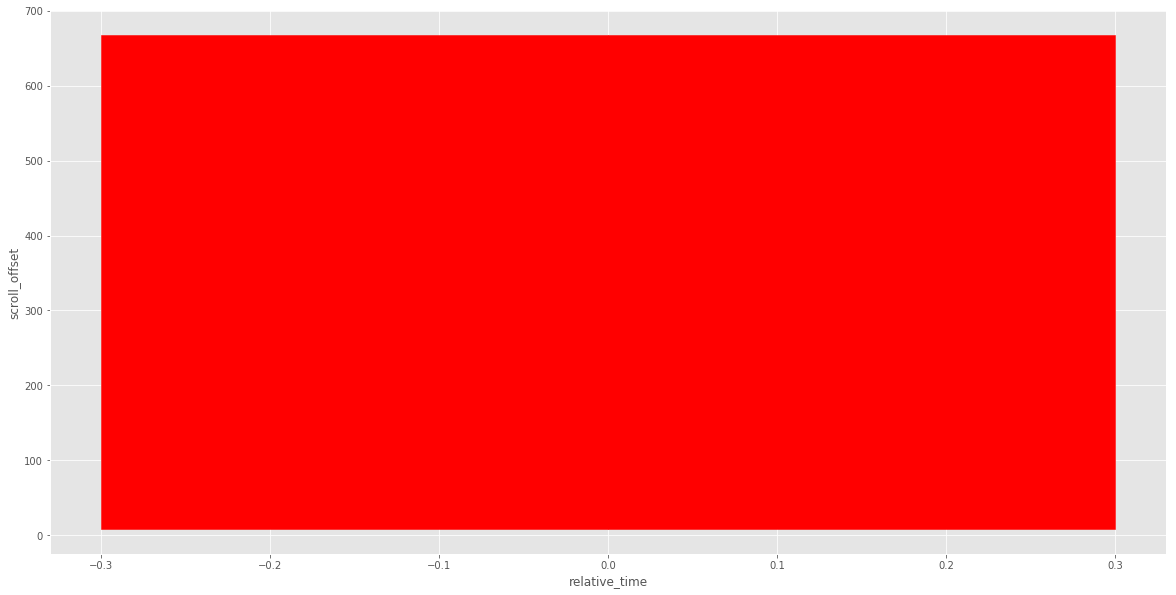

In [11]:
ohlc= filtered_data5[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a1bf83f60>,
  <matplotlib.patches.Rectangle at 0x1a1c24c240>])

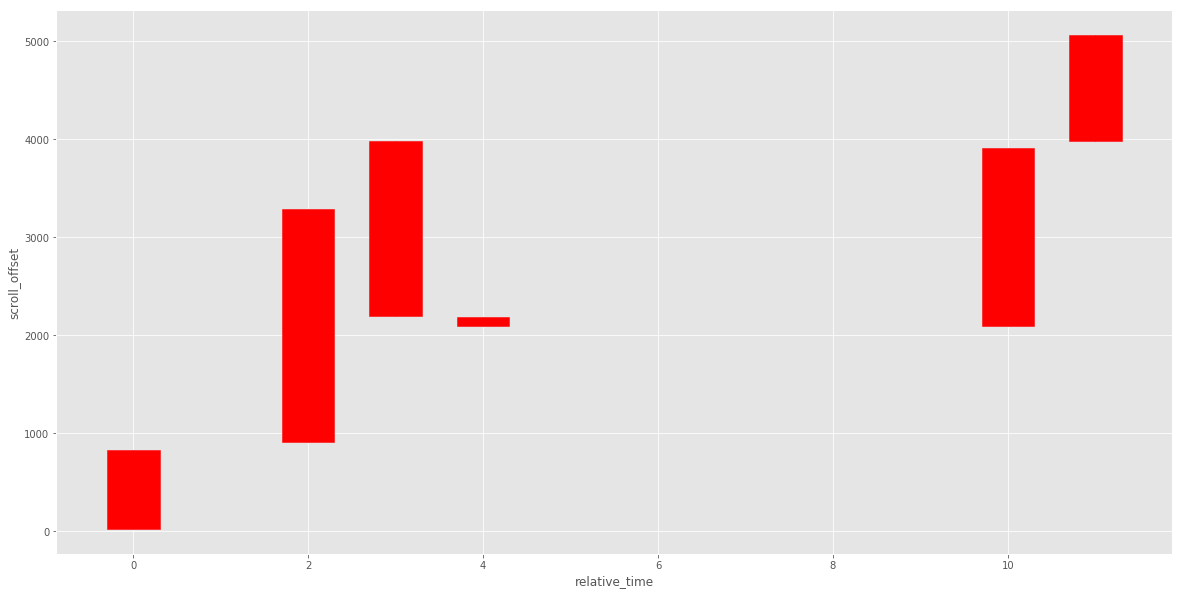

In [12]:
ohlc= filtered_data6[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a1c564160>,
  <matplotlib.patches.Rectangle at 0x1a1c56dd30>])

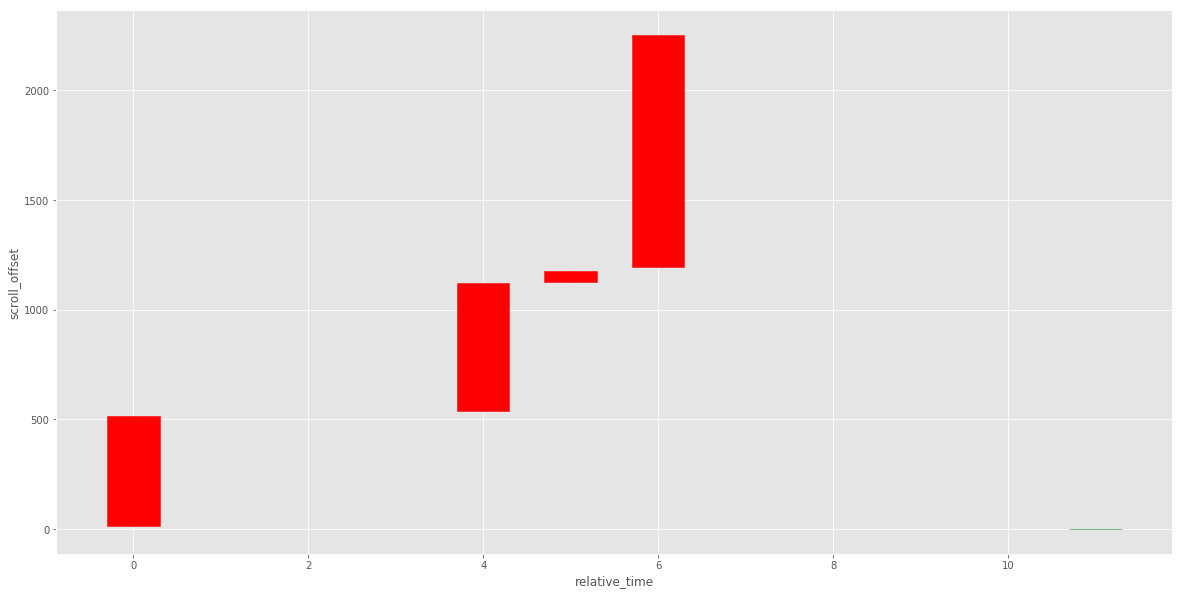

In [13]:
ohlc= filtered_data7[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a1c5d4630>,
  <matplotlib.patches.Rectangle at 0x1a1c5d4e10>])

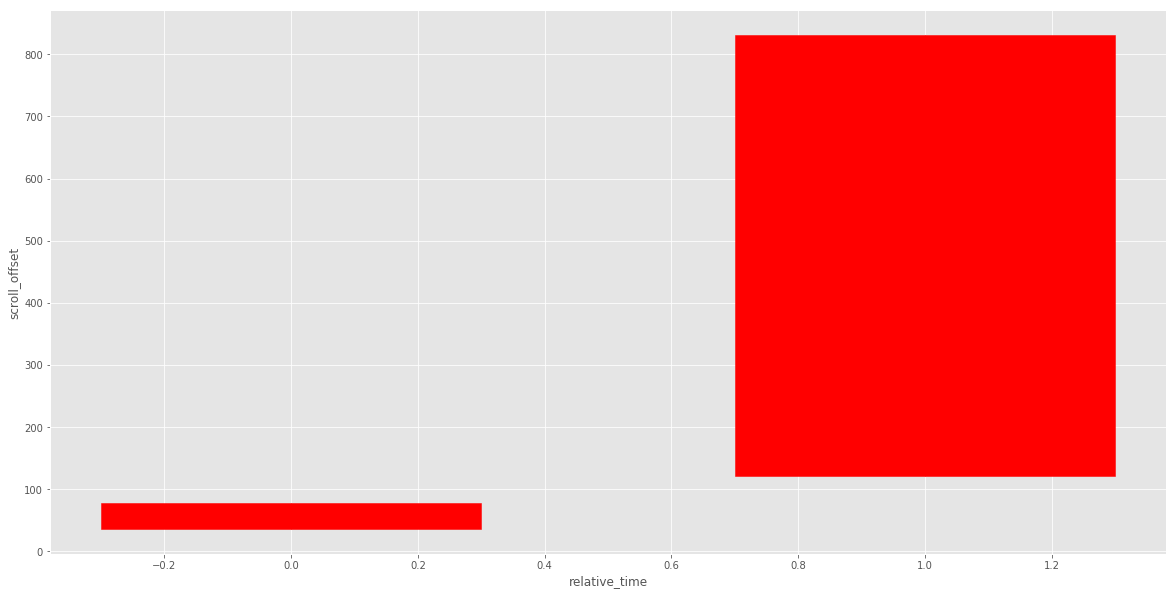

In [14]:
ohlc= filtered_data8[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a1c8ff940>,
  <matplotlib.patches.Rectangle at 0x1a1c90a7f0>])

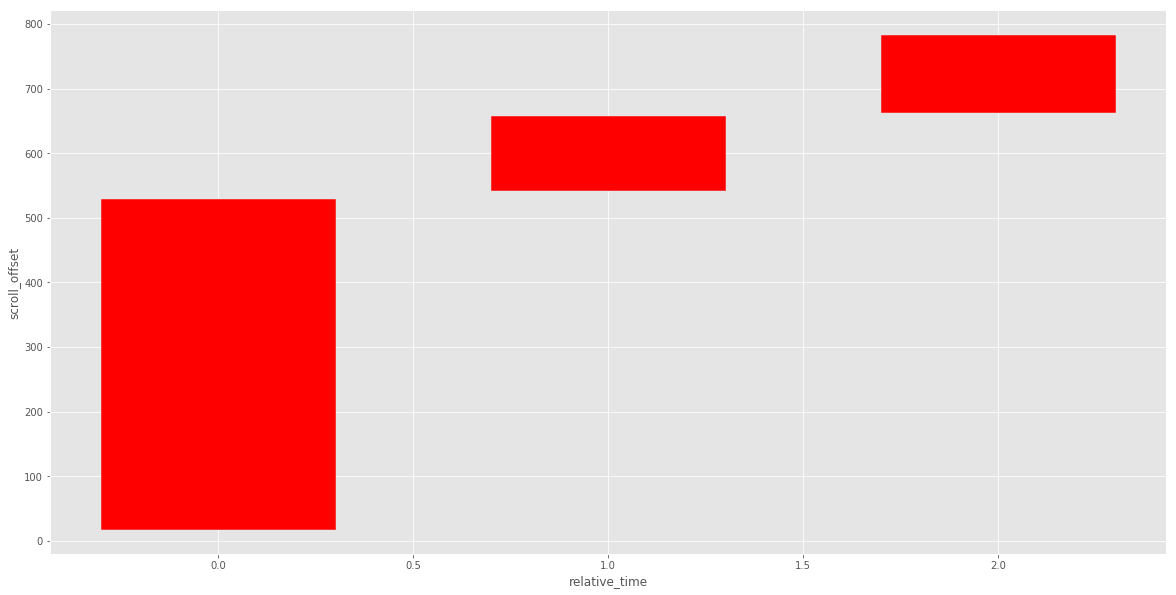

In [15]:
ohlc= filtered_data9[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a1cc1bb38>,
  <matplotlib.patches.Rectangle at 0x1a1cc300b8>])

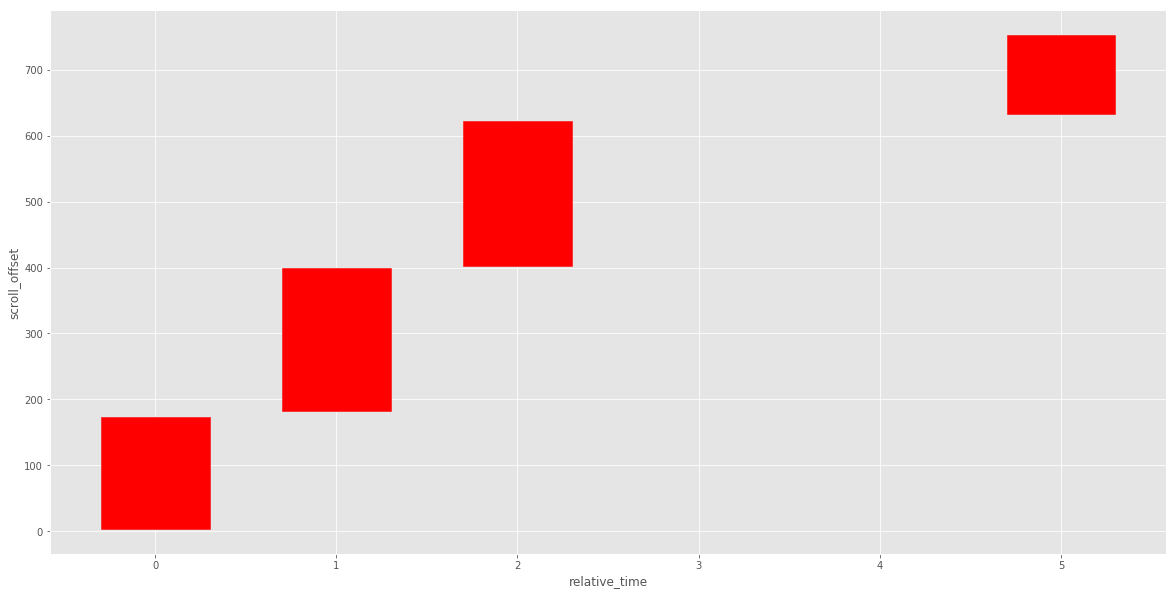

In [16]:
ohlc= filtered_data10[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a1cf43240>,
  <matplotlib.patches.Rectangle at 0x1a1cf4ee10>])

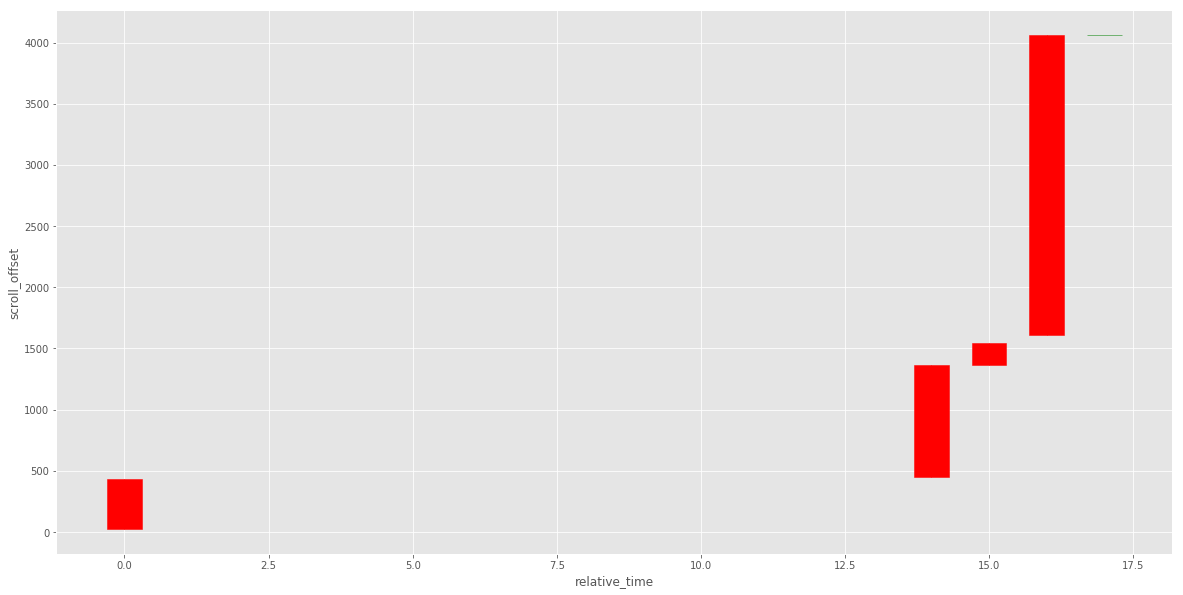

In [17]:
ohlc= filtered_data11[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')






([<matplotlib.lines.Line2D at 0x1a1d270a58>],
 [<matplotlib.patches.Rectangle at 0x1a1d270ba8>])

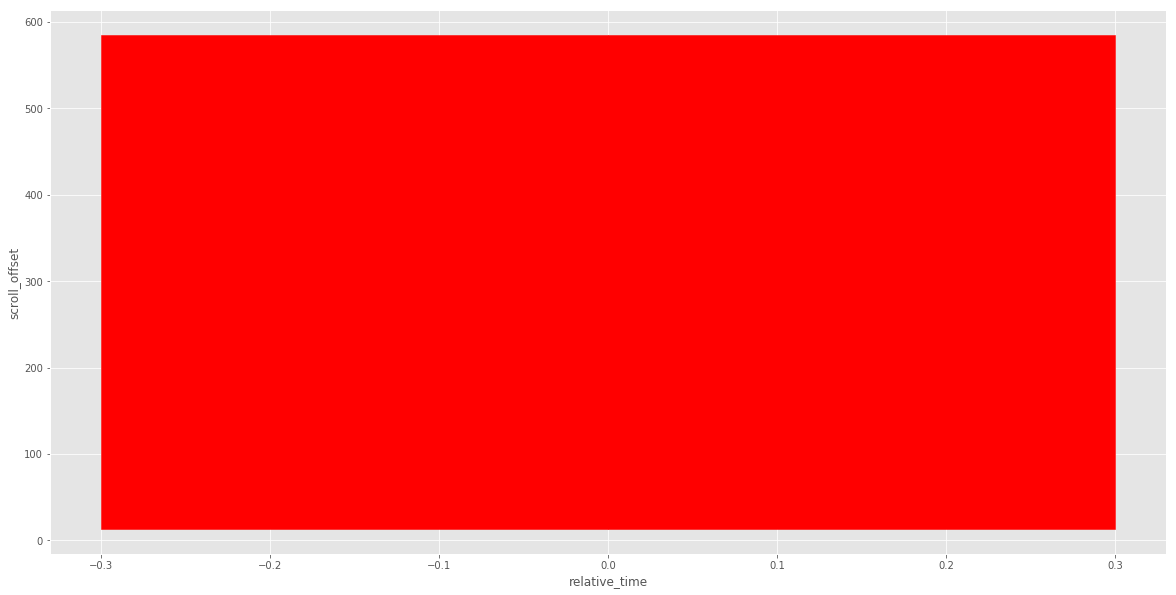

In [18]:
ohlc= filtered_data12[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')







([<matplotlib.lines.Line2D at 0x1a1d83a4a8>,
  <matplotlib.patches.Rectangle at 0x1a1d844358>])

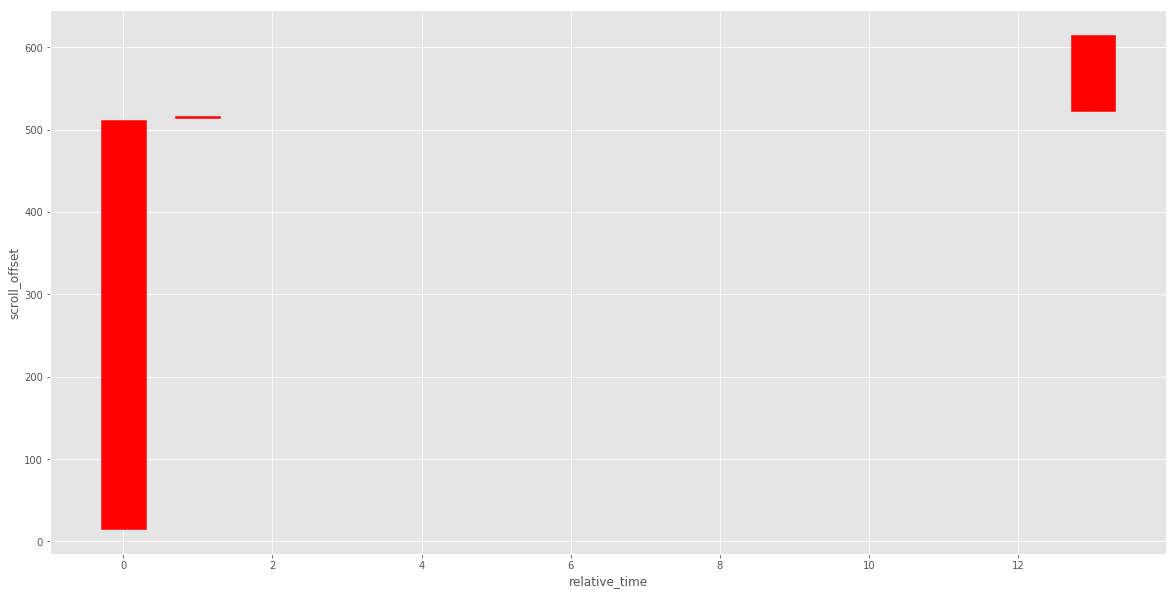

In [19]:
ohlc= filtered_data13[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')







([<matplotlib.lines.Line2D at 0x1a1d8abc88>,
  <matplotlib.patches.Rectangle at 0x1a1db914a8>])

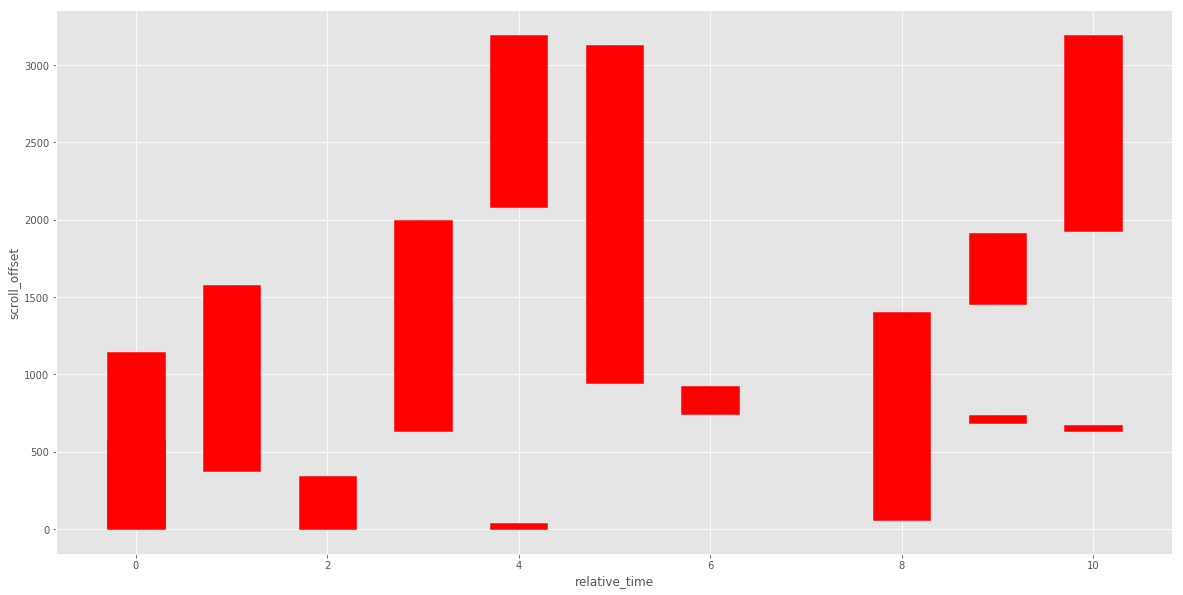

In [20]:
ohlc= filtered_data14[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')







In [21]:
ohlc= filtered_data15[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')







NameError: name 'filtered_data15' is not defined

In [ ]:
ohlc= filtered_data16[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')







In [ ]:
ohlc= filtered_data17[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')







In [ ]:
ohlc= filtered_data18[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')







In [ ]:
ohlc= filtered_data19[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')







([<matplotlib.lines.Line2D at 0x1a278b5278>,
  <matplotlib.patches.Rectangle at 0x1a278bfe48>])

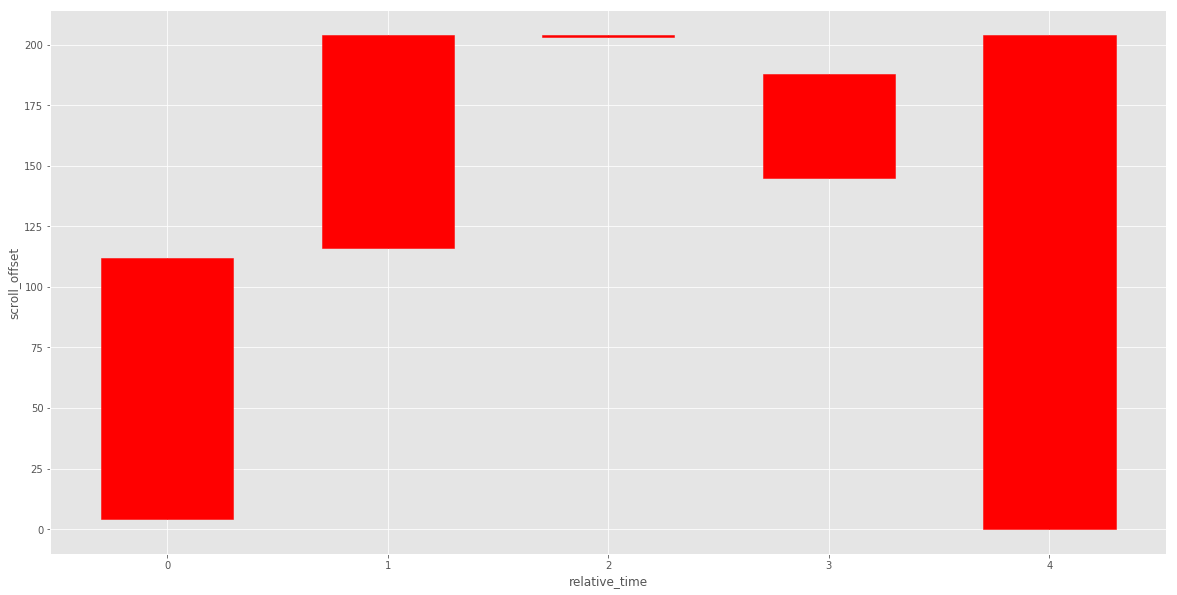

In [252]:
ohlc= filtered_data20[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





